In [ ]:
# Need to install packages Python <= 3.8
# scikit-learn
# tensorflow
# tensorflow_datasets

In [2]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)


In [3]:
from sklearn import datasets
digits = datasets.load_digits()


In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

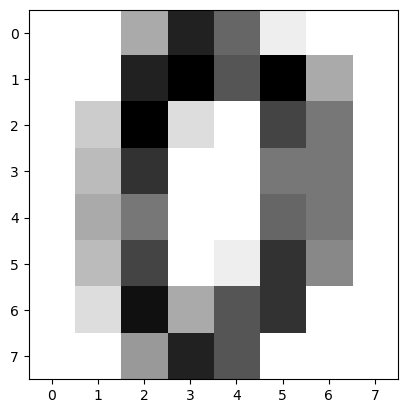

In [6]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')


In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
digits.target.size

1797

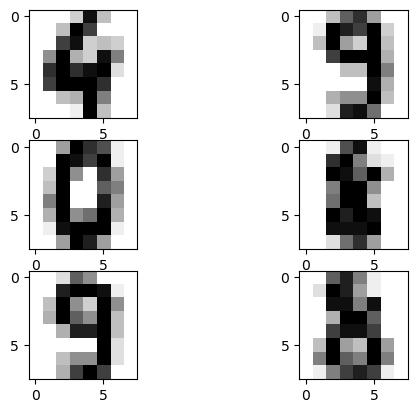

In [9]:
import matplotlib.pyplot as plt
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')


In [10]:
svc.fit(digits.data[1:1790], digits.target[1:1790])

SVC(C=100.0, gamma=0.001)

In [11]:
svc.predict(digits.data[1791:1976])

array([4, 9, 0, 8, 9, 8])

In [12]:
digits.target[1791:1976]



array([4, 9, 0, 8, 9, 8])

# Recognizing Handwritten Digits with TensorFlow

In [1]:
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# ADDED
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [13]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [14]:
x_validation = x_train[55000:]
x_train = x_train[:55000]
y_validation = y_train[55000:]
y_train = y_train[:55000]

In [15]:
len(x_train)

55000

In [16]:
len(x_validation)

5000

In [17]:
len(x_test)

10000

In [18]:
len(y_train)

55000

In [60]:
x_train[0].shape

(28, 28)

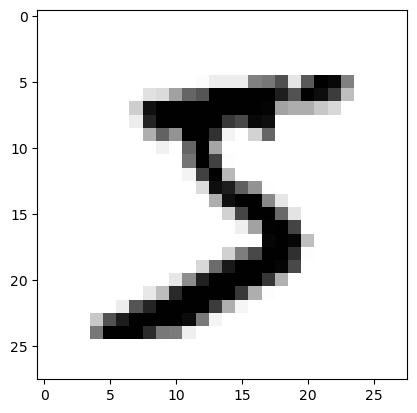

In [61]:
plt.imshow(x_train[0], cmap=plt.cm.gray_r, interpolation='nearest')

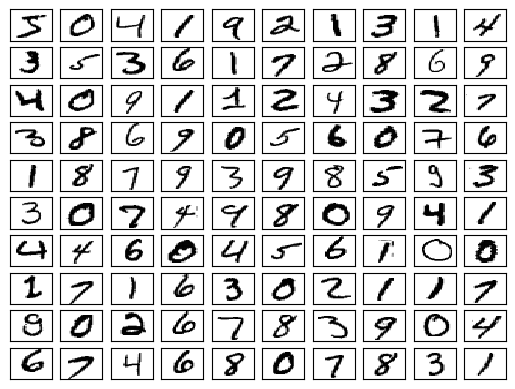

In [19]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), 
                        cmap=plt.cm.gray_r,
                        interpolation='nearest',
                        aspect='auto')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        k += 1



In [23]:
print(np.max(x_train))
np.min(x_train)

255


0

In [25]:
train_features = tf.convert_to_tensor(x_train)
train_labels = tf.convert_to_tensor(y_train) 
test_features = tf.convert_to_tensor(x_test)
test_labels =  tf.convert_to_tensor(y_test)
exp_features = tf.convert_to_tensor(x_validation)

In [26]:
train_features

<tf.Tensor: shape=(55000, 28, 28), dtype=uint8, numpy=
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0,

# Learning and Predicting with a SLP

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Normalization(),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [35]:
h = model.fit(train_features, train_labels, epochs=20)

Epoch 1/20
1719/1719 [==============================] - 3s 1ms/step - loss: 10.6817 - accuracy: 0.8341
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 6.1368 - accuracy: 0.8759
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 5.7782 - accuracy: 0.8798
Epoch 4/20
1719/1719 [==============================] - 3s 1ms/step - loss: 5.5405 - accuracy: 0.8824
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 5.4812 - accuracy: 0.8840
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 5.3873 - accuracy: 0.8851
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 5.3120 - accuracy: 0.8861
Epoch 8/20
1719/1719 [==============================] - 2s 1ms/step - loss: 5.2421 - accuracy: 0.8876
Epoch 9/20
1719/1719 [==============================] - 2s 1ms/step - loss: 5.2106 - accuracy: 0.8880
Epoch 10/20
1719/1719 [==============================] - 3s 2ms/step - loss: 5.29

In [36]:
acc_set = h.history['loss']
epoch_set = h.epoch

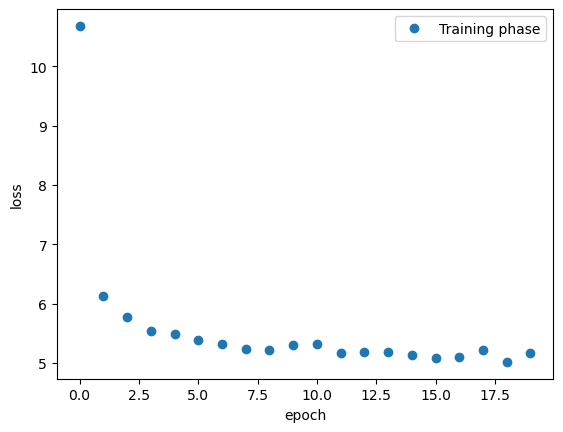

In [37]:
plt.plot(epoch_set,acc_set, 'o', label='Training phase')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


In [38]:
model.evaluate(test_features, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 5.8654 - accuracy: 0.8925


[5.865407466888428, 0.8924999833106995]

In [39]:
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [40]:
predictions = probability_model.predict(exp_features)

157/157 [==============================] - 0s 981us/step


In [41]:
predictions[0]

array([0.04717345, 0.12823072, 0.12823072, 0.12823072, 0.1282307 ,
       0.08905466, 0.04721416, 0.04717345, 0.12823072, 0.12823072],
      dtype=float32)

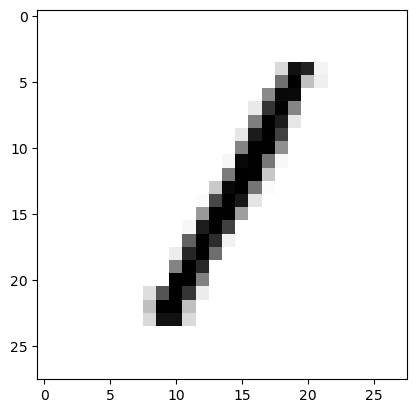

In [47]:
plt.imshow(x_validation[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [48]:
y_validation[0]

1

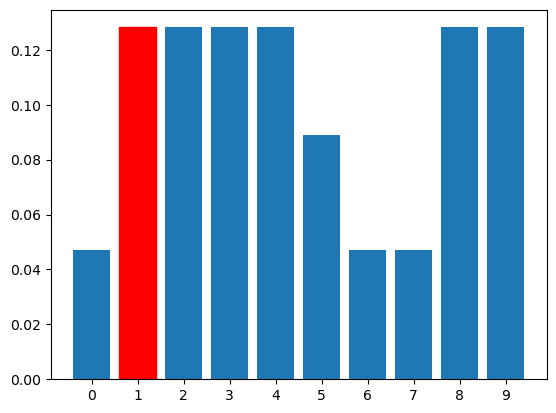

In [59]:
p = plt.bar(np.arange(10),predictions[0])
plt.xticks(np.arange(10))
predicted_label = np.argmax(predictions[0])
p[predicted_label].set_color('red')

In [91]:
predictions[13]

array([0.07372559, 0.07270355, 0.07317524, 0.07424378, 0.13360192,
       0.07305884, 0.07261127, 0.13158722, 0.09798288, 0.1973097 ],
      dtype=float32)

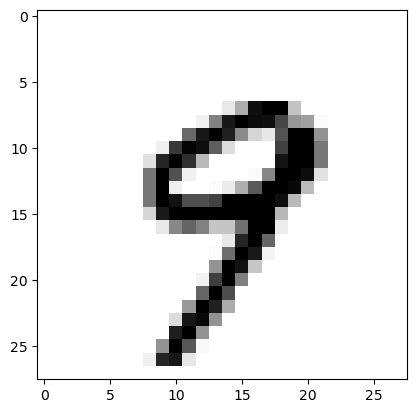

In [71]:
plt.imshow(x_validation[13], cmap=plt.cm.gray_r, interpolation='nearest')

In [72]:
y_validation[13]

9

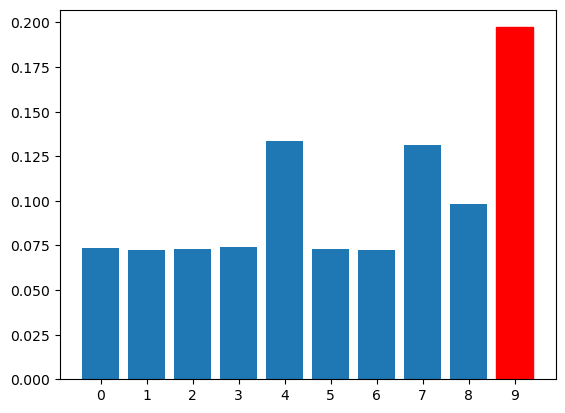

In [90]:
p = plt.bar(np.arange(10),predictions[13])
plt.xticks(np.arange(10))
predicted_label = np.argmax(predictions[13])
p[predicted_label].set_color('red')

# Learning and Predicting with a MLP

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Normalization(),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [78]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [79]:
h = model.fit(train_features, train_labels, epochs=20)

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4885 - accuracy: 0.8658
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3243 - accuracy: 0.9013
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.9093
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2630 - accuracy: 0.9171
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2423 - accuracy: 0.9250
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2370 - accuracy: 0.9268
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2174 - accuracy: 0.9322
Epoch 8/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2114 - accuracy: 0.9341
Epoch 9/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1942 - accuracy: 0.9407
Epoch 10/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.185

In [80]:
acc_set = h.history['loss']
epoch_set = h.epoch

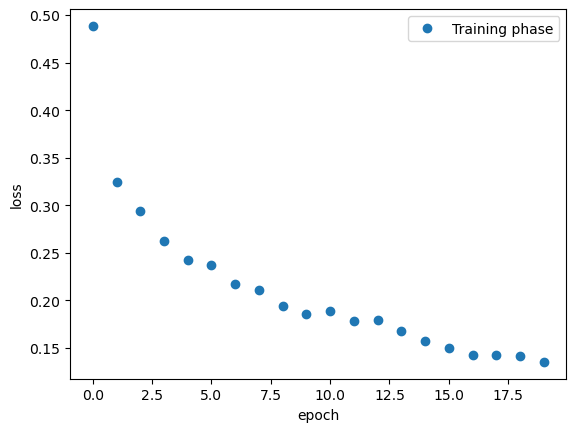

In [81]:
plt.plot(epoch_set,acc_set, 'o', label='Training phase')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


In [82]:
model.evaluate(test_features, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.1537 - accuracy: 0.9511


[0.1537058800458908, 0.9510999917984009]

In [83]:
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [84]:
predictions = probability_model.predict(exp_features)

157/157 [==============================] - 0s 1ms/step


In [86]:
predictions[0]

array([0.07896608, 0.21424502, 0.08096407, 0.07952367, 0.08464722,
       0.07919335, 0.08132026, 0.11285783, 0.10845622, 0.07982624],
      dtype=float32)

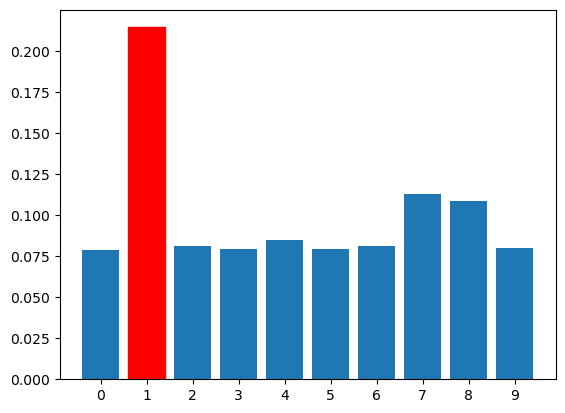

In [87]:
p = plt.bar(np.arange(10),predictions[0])
plt.xticks(np.arange(10))
predicted_label = np.argmax(predictions[0])
p[predicted_label].set_color('red')

In [88]:
predictions[13]

array([0.07372559, 0.07270355, 0.07317524, 0.07424378, 0.13360192,
       0.07305884, 0.07261127, 0.13158722, 0.09798288, 0.1973097 ],
      dtype=float32)

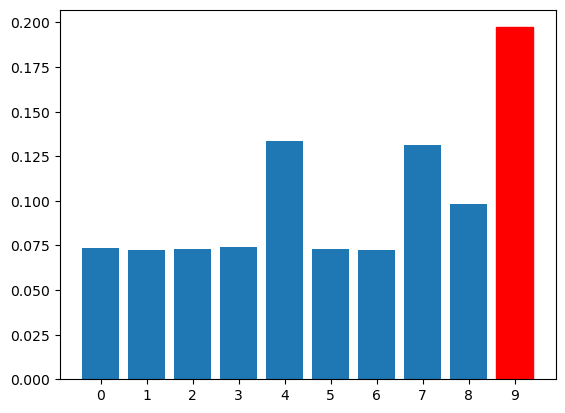

In [89]:
p = plt.bar(np.arange(10),predictions[13])
plt.xticks(np.arange(10))
predicted_label = np.argmax(predictions[13])
p[predicted_label].set_color('red')